In [28]:
import numpy as np
import pandas as pd
import re


In [66]:
# data = pd.read_csv('../Call_Transcripts_Seeking_Alpha/CallTranscriptsFITB.txt', sep=" ", header=None)
file = open('../Call_Transcripts_Seeking_Alpha/CallTranscriptsFITB.txt', 'r') 
fullCallTranscript = file.readlines()   #.split('Question-and-Answer Session')
len(fullCallTranscript)
# text = (file.readlines())

1869

In [67]:
q_and_a_index = fullCallTranscript.index("Question-and-Answer Session\n")

In [76]:
# Divide the trnacript into initial summary and Q & A Session
q_and_a = fullCallTranscript[q_and_a_index:]
summary = fullCallTranscript[:q_and_a_index]

In [79]:
execIndex = summary.index("Executives\n")
analystIndex = summary.index("Analysts\n")
operatorIndex = summary.index("Operator\n")

In [93]:
executives = summary[execIndex + 1 : analystIndex]
print(executives)
executiveDict = {}
for e in executives:
    name, position = e.split('-')
    executiveDict[name.strip()] = position.strip()
executiveDict

['Jenn Thompson - Director, IR\n', 'Andrew Cecere - Chairman, President and CEO\n', 'Terrance Dolan - Vice Chairman and CFO\n']


{'Jenn Thompson': 'Director, IR',
 'Andrew Cecere': 'Chairman, President and CEO',
 'Terrance Dolan': 'Vice Chairman and CFO'}

In [95]:
analysts = summary[analystIndex +1: operatorIndex]
print(analysts)

analystsDict = {}
for a in analysts:
    name, company = a.split('-')
    analystsDict[name.strip()] = company.strip()
analystsDict

['John McDonald - Sanford C. Bernstein & Co., LLC\n', 'John Pancari - Evercore ISI\n', "Matthew O'Connor - Deutsche Bank\n", 'Kenneth Usdin - Jefferies & Company, Inc.\n', 'Erika Najarian - Bank of America Merrill Lynch\n', "Scott Siefers - Sandler O'Neill + Partners, L.P\n", 'Betsy Graseck - Morgan Stanley\n', 'Mike Mayo - Wells Fargo Securities\n', 'Marty Mosby - Vining Sparks\n', 'Kevin Barker - Piper Jaffray\n', 'Vivek Juneja - JPMorgan Chase & Company\n', 'Saul Martinez - UBS\n', 'Gerard Cassidy - RBC Capital Markets\n', 'Brian Klock - Keefe, Bruyette & Woods\n']


{'John McDonald': 'Sanford C. Bernstein & Co., LLC',
 'John Pancari': 'Evercore ISI',
 "Matthew O'Connor": 'Deutsche Bank',
 'Kenneth Usdin': 'Jefferies & Company, Inc.',
 'Erika Najarian': 'Bank of America Merrill Lynch',
 'Scott Siefers': "Sandler O'Neill + Partners, L.P",
 'Betsy Graseck': 'Morgan Stanley',
 'Mike Mayo': 'Wells Fargo Securities',
 'Marty Mosby': 'Vining Sparks',
 'Kevin Barker': 'Piper Jaffray',
 'Vivek Juneja': 'JPMorgan Chase & Company',
 'Saul Martinez': 'UBS',
 'Gerard Cassidy': 'RBC Capital Markets',
 'Brian Klock': 'Keefe, Bruyette & Woods'}

In [118]:
# Get and store the answers of the executives in the executivesDictionary

# elem,next_elem in zip(li, li[1:]+[li[0]]):
for item,next_item in zip(q_and_a, q_and_a[1:]+[q_and_a[0]]):
#     print(item)
    if item.strip() in executiveDict.keys():
        val = executiveDict[item.strip()]
        executiveDict[item.strip()] = val + ' ' + next_item
#         print(item, next_item)
        
print(executiveDict['Andrew Cecere'])

In [121]:
# Get and store the answers of the analysts in the analystsDictionary

# elem,next_elem in zip(li, li[1:]+[li[0]]):
for item,next_item in zip(q_and_a, q_and_a[1:]+[q_and_a[0]]):
#     print(item)
    if item.strip() in analystsDict.keys():
        val = analystsDict[item.strip()]
        analystsDict[item.strip()] = val + ' ' + next_item
#         print(item, next_item)
        
print(analystsDict.keys())
print(analystsDict['John McDonald'])

dict_keys(['John McDonald', 'John Pancari', "Matthew O'Connor", 'Kenneth Usdin', 'Erika Najarian', 'Scott Siefers', 'Betsy Graseck', 'Mike Mayo', 'Marty Mosby', 'Kevin Barker', 'Vivek Juneja', 'Saul Martinez', 'Gerard Cassidy', 'Brian Klock'])
Sanford C. Bernstein & Co., LLC Hi good morning guys. Wanted to ask a little bit about the positive operating leverage, you had a nice print on positive operating leverage this quarter, looks like about 80 basis points. Just wondering how much help you got on the expense line this quarter from some of the accrual reversals and any other one-timers that you mentioned?
 Okay. And Andy just a quick follow-up. Is the 1% to 1.5% still kind of a good target as you sit here now and look out to 2019 for the operating leverage that you're going to shoot for?
 Okay. And then one quick follow-up Terry. The FDI insurance fees lower that you mentioned, what was the driver of that? And you still have a stepdown coming from the end of the surcharge later in the

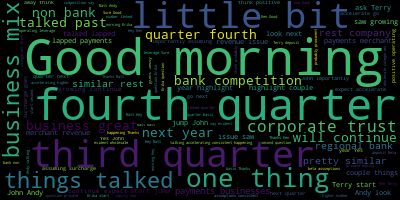

In [122]:
import wordcloud
wordcloud = wordcloud.WordCloud() # Create a wordcloud object
wordcloud.generate(executiveDict['Andrew Cecere'])   # Generate a wordcloud
wordcloud.to_image()              # Visualize the word cloud

In [12]:
import os
file_list = os.listdir("../Call_Transcripts_Seeking_Alpha/")


In [16]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [17]:
#create an object of class PorterStemmer
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [20]:
from nltk.tokenize import sent_tokenize, word_tokenize

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)



In [22]:
x=stemSentence(text)
print(len(x))

227042


In [24]:
from pycorenlp import StanfordCoreNLP


In [27]:
from stanfordcorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('/Users/name/stanford-corenlp-full-2018-10-05')

sentence = 'Guangdong University of Foreign Studies is located in Guangzhou.'
print('Tokenize:', nlp.word_tokenize(sentence))
print('Part of Speech:', nlp.pos_tag(sentence))
print('Named Entities:', nlp.ner(sentence))
print('Constituency Parsing:', nlp.parse(sentence))
print('Dependency Parsing:', nlp.dependency_parse(sentence))

nlp.close() # Do not forget to close! The backend server will consume a lot memory.

OSError: /Users/name/stanford-corenlp-full-2018-10-05 is not a directory.